<a href="https://colab.research.google.com/github/callee2006/MachineLearning/blob/master/MLP_(scikit_learn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file contains practice examples of the following topics:

* Neural Networks	(MLP)
  - MLP classification
  - MLP regression


(Most of the contents and code are from "Introduction to Machine Learning with Python" by Andreas C. Müller & Sarah Guido)

In [1]:
! pip install mglearn

import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Neural Networks with sci-kit learn

* Mathmetical model to immitate biological neurons

* Powerful, flexible, scalable (Reemerging with deep learning)

* Mapping between vectors or sequences.
> classification, regression, transform tasks, detection, segmentation
  
* Learns probabilistic densities
> generation, transform, annomaly detection


* $y_j=f(\sum_i{w_{ij} x_i}+b_j)$

> $f(\cdot)$: nonlinear activation function (ReLU, sigmoid, tanh, etc.)

* training algorithm: backpropagation



see: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


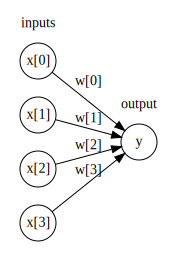

In [2]:
# Single-layer perceptron (similar to logistic regression)

# works for only linearly separable tasks

display(mglearn.plots.plot_logistic_regression_graph())

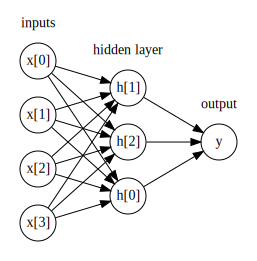

In [3]:
# Multi-layer perceptron

# Applicable to non-separable tasks  (universal approximator theorem)

display(mglearn.plots.plot_single_hidden_layer_graph())

line =
 [-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909

Text(0, 0.5, 'sigmoid(x), relu(x), tanh(x)')

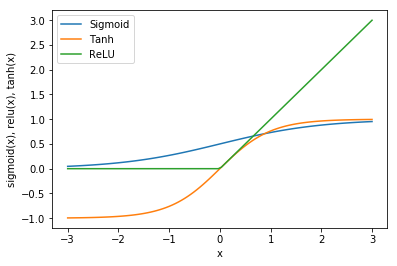

In [4]:
# non-linearity functions (sigmoid, tanh, ReLU)

# x coordinates from -3 to 3
line = np.linspace(-3, 3, 100)
print("line =\n", line)

# sigmoid (logistic)
plt.plot(line, [1/(1+np.exp(-x)) for x in line], label="Sigmoid")

# tanh
plt.plot(line, np.tanh(line), label="Tanh")

# ReLU
plt.plot(line, np.maximum(line, 0), label="ReLU")

plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("sigmoid(x), relu(x), tanh(x)")

# Classification with MLP

X_train.shape =  (75, 2)
X_train =
 [[ 0.08686038  0.49400243]
 [ 1.53286262 -0.03063104]
 [ 0.65294065  0.80929512]
 [ 0.64076308 -0.19860992]
 [-0.08661448 -0.03887081]
 [ 0.87435391  0.83750547]
 [ 1.26285558  0.12916271]
 [-0.18746498  0.86188606]
 [ 0.91068654  0.12727649]
 [-0.04686928 -0.01567029]]
y_train.shape =  (75,)


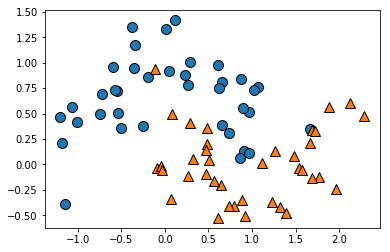

In [5]:
# generate data

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

print("X_train.shape = ", X_train.shape)
print("X_train =\n", X_train[:10])
print("y_train.shape = ", y_train.shape)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

Text(0, 0.5, 'Feature 1')

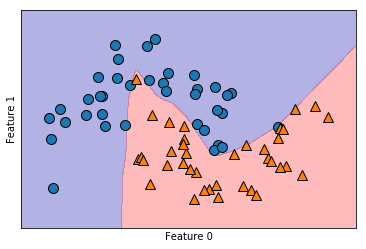

In [6]:
# using 100 hidden units  (default)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)   # LBFGS (memory limited BFGS): a quasi Newton optimizing algorithm

# visualize MLP
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

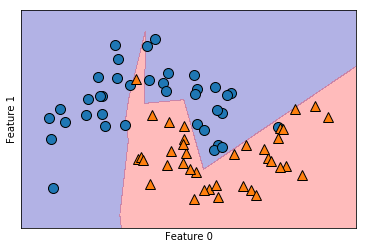

In [7]:
# using 10 hidden units

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

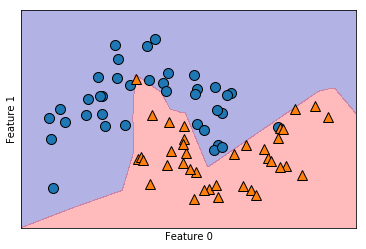

In [8]:
# using two hidden layers, with 10 units each

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

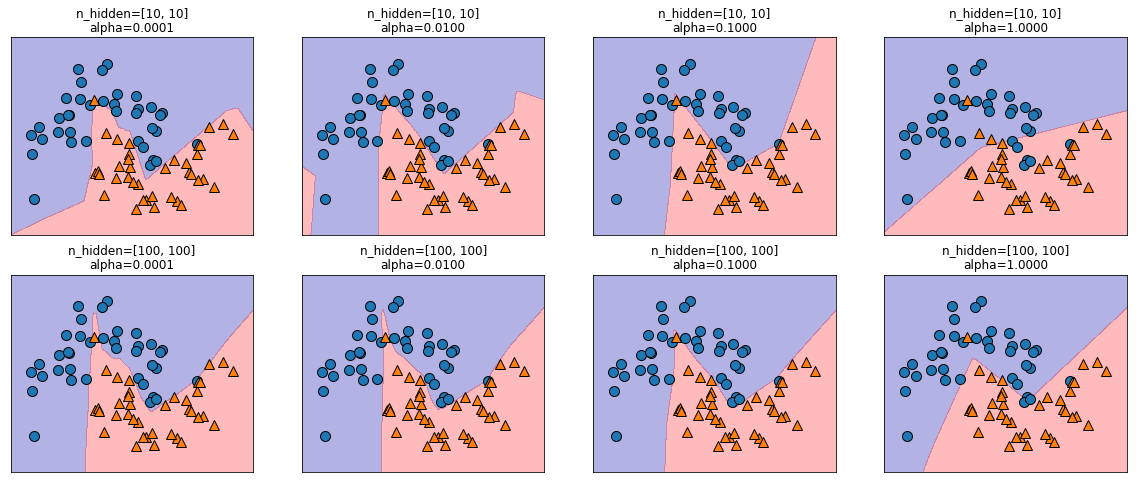

In [9]:
# hidden nodes, regularization
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
  for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
    mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

## Preprocessing data for MLP (standaridzation)

In [0]:
# load cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [11]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: ", mlp.score(X_train, y_train))
print("Accuracy on test set: ", mlp.score(X_test, y_test))

Accuracy on training set:  0.9389671361502347
Accuracy on test set:  0.916083916083916


In [12]:
# Normalizing data for MLP

# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
print("mean_on_train =", mean_on_train)
print("std_on_train =", std_on_train)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mean_on_train = [1.41591714e+01 1.92330047e+01 9.21438967e+01 6.58415023e+02
 9.63659859e-02 1.03669601e-01 8.86501308e-02 4.91440610e-02
 1.80473239e-01 6.26169953e-02 4.04795070e-01 1.21222723e+00
 2.84097934e+00 4.06956737e+01 6.98667371e-03 2.50779930e-02
 3.16993207e-02 1.17015352e-02 2.04367559e-02 3.71274953e-03
 1.63168169e+01 2.56379812e+01 1.07459131e+02 8.87647887e+02
 1.32503404e-01 2.52836338e-01 2.69481120e-01 1.15279345e-01
 2.89649296e-01 8.35402582e-02]
std_on_train = [3.54820940e+00 4.11777749e+00 2.44085763e+01 3.60001771e+02
 1.38386118e-02 5.06235856e-02 7.84252380e-02 3.87729435e-02
 2.76599707e-02 6.84425158e-03 2.86830175e-01 5.45592960e-01
 2.05927160e+00 4.84585335e+01 2.82332840e-03 1.69519540e-02
 3.14116890e-02 5.90579400e-03 8.19292513e-03 2.62721557e-03
 4.88905984e+00 6.05754894e+00 3.39251771e+01 5.85664376e+02
 2.29034367e-02 1.51720808e-01 1.98125175e-01 6.55415896e-02
 6.32173051e-02 1.77743394e-02]


In [13]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: ", mlp.score(X_train_scaled, y_train))
print("Accuracy on test set: ", mlp.score(X_test_scaled, y_test))

Accuracy on training set:  0.9929577464788732
Accuracy on test set:  0.965034965034965


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Exercises: Recognize digit images with MLPClassifier


In [24]:
# import and load Iris data
from sklearn.datasets import load_digits
digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(digit.data, digit.target, random_state=42)
print("X.train.shape = ", X_train.shape)
print("X.train =\n", X_train[:5])

X.train.shape =  (1347, 64)
X.train =
 [[ 0.  0.  2. 15. 15. 16. 11.  0.  0.  0.  8. 16. 11.  3.  0.  0.  0.  0.
  13.  9.  0.  0.  0.  0.  0.  5. 16.  3.  9. 11.  3.  0.  0. 10. 15. 15.
  16. 16. 11.  0.  0.  6. 16. 10.  7. 16.  5.  0.  0.  0.  3.  4. 15.  8.
   0.  0.  0.  0.  4. 15.  7.  0.  0.  0.]
 [ 0.  5. 16. 15.  3.  0.  0.  0.  0. 11. 14. 11. 11.  0.  0.  0.  0.  8.
  11.  4. 16.  0.  0.  0.  0.  0.  0.  4. 13.  0.  0.  0.  0.  0.  0.  8.
  12.  0.  0.  0.  0.  0.  0. 13.  9.  5.  1.  0.  0.  1. 11. 16. 16. 16.
  10.  0.  0.  5. 16. 14.  8.  6.  1.  0.]
 [ 0.  0.  4. 13.  8.  0.  0.  0.  0.  0. 13. 16. 15.  7.  0.  0.  0.  3.
  16.  9.  6. 15.  6.  0.  0.  8. 14.  0.  0.  4.  8.  0.  0.  8. 12.  0.
   0.  4.  8.  0.  0.  4. 12.  0.  0. 11.  6.  0.  0.  0. 14. 10. 12. 14.
   1.  0.  0.  0.  7. 15. 11.  2.  0.  0.]
 [ 0.  0.  3. 13. 13.  3.  0.  0.  0.  2. 14. 12. 12. 11.  0.  0.  0.  4.
  16.  8.  5. 15.  3.  0.  0.  1. 13. 14. 16.  7.  0.  0.  0.  0. 11. 16.
  13.  1.  0.  0. 

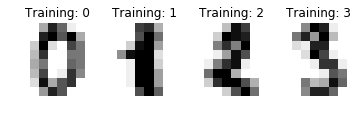

In [21]:
images_and_labels = list(zip(digits.images, digits.target))
# print(images_and_labels[0:3])

for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [0]:
# split data into trainin and test sets




In [22]:
# import MLPClassifier


# create MLPClassifier instance


# train


# display accuracy
print("Accuracy on training set: ", mlp_cancer.score(X_train, y_train))
print("Accuracy on test set: ", mlp_cancer.score(X_test, y_test))

NameError: ignored

In [0]:
# Normalizing data for MLP

# compute the mean value per feature on the training set



# this is to avoid division by zero
std_on_train[std_on_train == 0] = 1
print("std_on_train =", std_on_train)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1


In [0]:
#import MLPClassifier

#create MLPClassifier instance

# train

# display accuracy
print("Accuracy on training set: ", mlp_cancer.score(X_train_scaled, y_train))
print("Accuracy on test set: ", mlp_cancer.score(X_test_scaled, y_test))

# Regression with MLP

See https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html


In [0]:
# load data
#X, y = mglearn.datasets.make_wave()

# generate data along sine wave


# generate data
X = np.linspace(-3, 3, 100)
y = np.sin(X) + np.random.normal(loc=0, scale=0.3,size=len(X))
X = np.expand_dims(X, axis=-1)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# plot data
plt.scatter(X_train, y_train, marker='o', label="training")
plt.scatter(X_test, y_test, marker='^', label="test")
plt.legend()

In [0]:
from sklearn.neural_network import MLPRegressor
mlpR = MLPRegressor(activation = 'tanh', hidden_layer_sizes = (100, 100), max_iter=100000).fit(X_train, y_train)


# ridge regression for comparison
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)

print("Training set score: {:.2f}".format(mlpR.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mlpR.score(X_test, y_test)))

import matplotlib.pyplot as plt

# plot data
plt.scatter(X_train, y_train, marker='o', label="training")
plt.scatter(X_test, y_test, marker='^', label="test")

# plot prediction by MLP regressor
line = np.linspace(-3, 3, 100)
line = np.expand_dims(line, axis=-1)        # mlpR input should be an array of rank 2
line_MLP = mlpR.predict(line)
plt.scatter(line, line_MLP, marker='*', label="prediction by MLP")


# for comparison, plot prediction by Ridge regressor
line_ridge = ridge.predict(line)
plt.scatter(line, line_ridge, marker='.', label="prediction by ridge")

plt.legend()